#### 31.01.2026
# Projekt zaliczeniowy (PRIAD) 

### Autorzy:
- Olaf Naruszko
- Maciej Magnuszewski

### Zbiór danych: E-Commerce Sales Dataset

https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

Zbiór danych przedstawia szczegółową analizę rentowności sprzedaży e-commerce. Zawiera informacje o sprzedaży, a także dane finansowe dotyczące kosztów, przychodów i zysków. Dane obejmują szczegóły produktowe (SKU, numery modeli, stany magazynowe, kategorie, rozmiary, kolory) oraz ceny detaliczne na platformach sprzedażowych, takich jak Amazon. Dodatkowo uwzględnia on informacje transakcyjne, m.in. datę sprzedaży, ilość, walutę, kwotę brutto, kwotę zapłaconą przez klienta, sposób realizacji zamówienia oraz status B2B/B2C. Zbiór danych umożliwia analizę efektywności kanałów sprzedaży oraz ocenę rentowności produktów w handlu internetowym.

Zadania do wykonania:
1. **Analizę aksploracyjna (statystyki opisowe, korelacje):**
kompletność, odchylenia standardowe, średnie, korelacje.  
2. **Wizualizacja:**
Box ploty, histogramy, scatter ploty (wszystkie pary atrybutów) ,  
3. **Uczenie Maszynowe:**
Regresja przewidująca ceny: Linera Regression, SVM, DecisionTreeRegressor. 

## 1. Analiza eksploracyjna

Projekt rozpoczynamy od analizy eksploracyjnej, aby dokładnie poznać strukturę zbioru, zidentyfikować kluczowe atrybuty oraz poznać ogólną jakość dostarczonych danych. Wyniki analizy bedą stanowić podstawę do dalszych analiz i modelowania.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:

df = pd.read_csv('Amazon Sale Report.csv')
print(f"Wymiary zbioru danych: {df.shape[0]} wierszy x {df.shape[1]} kolumn")

print("PIERWSZE 5 WIERSZY")
print(df.head())

print("PODSTAWOWE INFORMACJE O ZBIORZE")
print(df.info())

print("NAZWY KOLUMN")
print(df.columns.tolist())

print("TYPY DANYCH")
print(df.dtypes)

C:\Users\Olaf\AppData\Local\Temp\ipykernel_42596\1804203537.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


Wymiary zbioru danych: 128975 wierszy x 24 kolumn
PIERWSZE 5 WIERSZY
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amo

In [55]:
print("KONWERSJA TYPÓW DANYCH")

if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    print("Kolumna 'Amount' przekonwertowana na numeryczną")

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')
    print("Kolumna 'Date' przekonwertowana na datetime")

if 'Qty' in df.columns:
    df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
    print("Kolumna 'Qty' przekonwertowana na numeryczną")

if 'B2B' in df.columns:
    df['B2B'] = df['B2B'].map({'TRUE': True, 'FALSE': False, True: True, False: False})
    print("Kolumna 'B2B' przekonwertowana na boolean")

print("\nTypy danych po konwersji:")
print(df.dtypes)

KONWERSJA TYPÓW DANYCH
Kolumna 'Amount' przekonwertowana na numeryczną


Kolumna 'Date' przekonwertowana na datetime
Kolumna 'Qty' przekonwertowana na numeryczną
Kolumna 'B2B' przekonwertowana na boolean

Typy danych po konwersji:
index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                

W celu zapewnienia poprawnych dalszych obliczeń przekonwertowaliśmy niektóre kolumny na odpowiednie typym aby móc w pełni wykorzystać ich potencjał.

ANALIZA KOMPLETNOŚCI DANYCH
Liczba wierszy w zbiorze: 128,975

LICZBA KLAS (kolumna 'Status'):
Liczba unikalnych klas: 13

LICZBA OBIEKTÓW W KAŻDEJ KLASIE:
Status
Cancelled                        18332
Pending                            658
Pending - Waiting for Pick Up      281
Shipped                          77804
Shipped - Damaged                    1
Shipped - Delivered to Buyer     28769
Shipped - Lost in Transit            5
Shipped - Out for Delivery          35
Shipped - Picked Up                973
Shipped - Rejected by Buyer         11
Shipped - Returned to Seller      1953
Shipped - Returning to Seller      145
Shipping                             8
Name: count, dtype: int64

Procent w każdej klasie:
Status
Cancelled                        14.21
Pending                           0.51
Pending - Waiting for Pick Up     0.22
Shipped                          60.32
Shipped - Damaged                 0.00
Shipped - Delivered to Buyer     22.31
Shipped - Lost in Transit         0.0

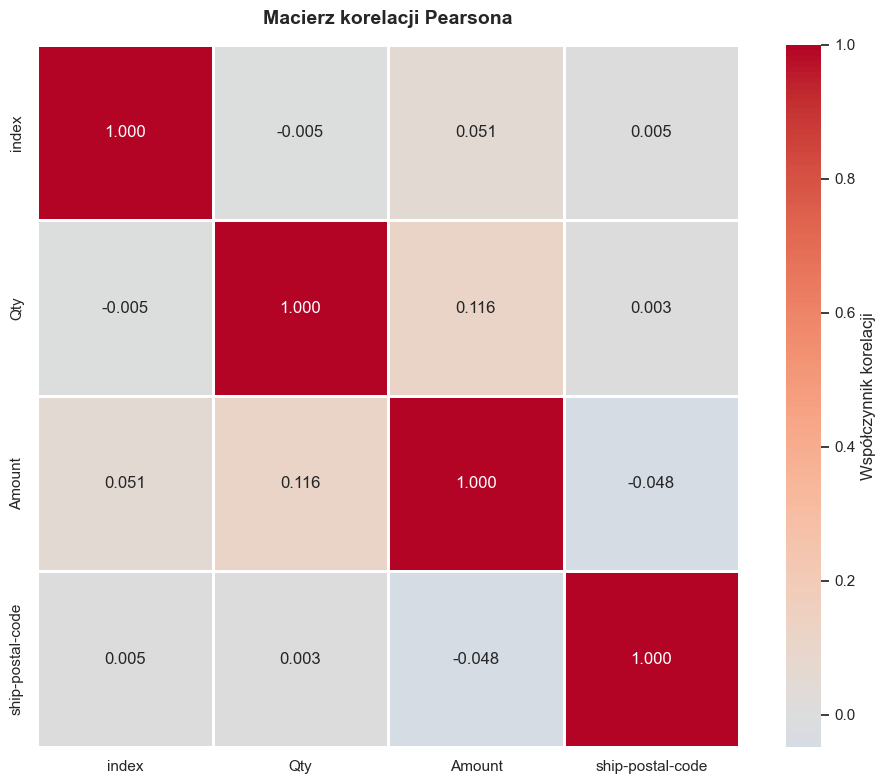



10 NAJSILNIEJSZYCH KORELACJI:
Para zmiennych                                           Korelacja
Qty     - Amount                      0.1160
index   - Amount                      0.0508
Amount  - ship-postal-code           -0.0479
index   - Qty                        -0.0048
index   - ship-postal-code            0.0045
Qty     - ship-postal-code            0.0027

PODSUMOWANIE PODSTAWOWYCH METRYK:
Liczba obiektów (po czyszczeniu): 113,825
Liczba klas: 13
Liczba atrybutów: 23
Brakujące dane: 0 (po czyszczeniu)
Usuniętych wierszy: 15,150 (11.75%)


In [60]:
print("ANALIZA KOMPLETNOŚCI DANYCH")

total_objects = len(df)
print(f"Liczba wierszy w zbiorze: {total_objects:,}")

target_column = 'Status'

if target_column in df.columns:
    num_classes = df[target_column].nunique()
    print(f"\nLICZBA KLAS (kolumna '{target_column}'):")
    print(f"Liczba unikalnych klas: {num_classes}")

    print(f"\nLICZBA OBIEKTÓW W KAŻDEJ KLASIE:")
    class_counts = df[target_column].value_counts().sort_index()
    print(class_counts)
    
    print("\nProcent w każdej klasie:")
    class_percent = (df[target_column].value_counts(normalize=True) * 100).sort_index()
    print(class_percent.round(2))
    
else:
    print(f"\nKolumna '{target_column}' nie istnieje w zbiorze danych")
    print("Dostępne kolumny kategoryczne do wyboru jako klasa:")
    print(df.select_dtypes(include='object').columns.tolist()[:10])

num_attributes = df.shape[1]
print(f"\nLICZBA ATRYBUTÓW/CECH:")
print(f"Liczba kolumn: {num_attributes}")

total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_percent = (total_missing / total_cells) * 100

print(f"\nLICZBA BRAKUJĄCYCH DANYCH:")
print(f"Całkowita liczba brakujących wartości: {total_missing:,}")
print(f"Procent brakujących danych: {missing_percent:.2f}%")
print(f"Kompletnych komórek: {total_cells - total_missing:,} / {total_cells:,}")

print(f"\nBRAKUJĄCE WARTOŚCI PO KOLUMNACH:")
missing_by_column = df.isnull().sum()
missing_by_column = missing_by_column[missing_by_column > 0].sort_values(ascending=False)

if len(missing_by_column) > 0:
    print("\nKolumny z brakującymi wartościami:")
    for col, count in missing_by_column.items():
        percent = (count / len(df)) * 100
        print(f"  {col:30s}: {count:6,} ({percent:5.2f}%)")
else:
    print("Brak brakujących wartości w żadnej kolumnie")

print("\nCZYSZCZENIE DANYCH")

original_rows = len(df)

if 'Unnamed: 22' in df.columns:
    df = df.drop(columns=['Unnamed: 22'])
    print("Usunięto kolumnę 'Unnamed: 22'")

if 'fulfilled-by' in df.columns:
    df = df.drop(columns=['fulfilled-by'])
    print("Usunięto kolumnę 'fulfilled-by'")

rows_before = len(df)
df = df[df['Qty'] > 0]
print(f"Usunięto {rows_before - len(df):,} wierszy z Qty = 0")

rows_before = len(df)
df = df[df['Amount'] > 0]
print(f"Usunięto {rows_before - len(df):,} wierszy z Amount = 0")

rows_before = len(df)
df = df.dropna(subset=['Amount', 'currency'])
print(f"Usunięto {rows_before - len(df):,} wierszy z brakami w Amount/currency")

cols_to_fill = {
    'promotion-ids': 'No Promotion',
    'Courier Status': 'Not Available',
    'ship-postal-code': 0,
    'ship-state': 'Unknown',
    'ship-city': 'Unknown',
    'ship-country': 'IN'
}

for col, fill_value in cols_to_fill.items():
    if col in df.columns:
        filled_count = df[col].isnull().sum()
        if filled_count > 0:
            df[col] = df[col].fillna(fill_value)
            print(f"Uzupełniono {filled_count:,} braków w '{col}'")

critical_cols = ['Status', 'Qty']
rows_before = len(df)
df = df.dropna(subset=critical_cols)
print(f"Usunięto {rows_before - len(df):,} wierszy z brakami w kolumnach krytycznych")

new_rows = len(df)
removed_rows = original_rows - new_rows
removed_percent = (removed_rows / original_rows) * 100

print(f"\nLiczba wierszy przed czyszczeniem: {original_rows:,}")
print(f"Liczba wierszy po czyszczeniu: {new_rows:,}")
print(f"Usuniętych wierszy: {removed_rows:,} ({removed_percent:.2f}%)")

remaining_missing = df.isnull().sum().sum()
print(f"Pozostałe brakujące wartości: {remaining_missing}")

if remaining_missing == 0:
    print("Wszystkie brakujące wartości zostały obsłużone.")

print("\nŚREDNIE I ODCHYLENIA STANDARDOWE")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    print(f"\nZmienne numeryczne ({len(numeric_cols)}):")
    print(numeric_cols)
    
    print("\nSTATYSTYKI OPISOWE:")
    
    stats_table = pd.DataFrame({
        'Średnia': df[numeric_cols].mean(),
        'Odchylenie std': df[numeric_cols].std(),
        'Mediana': df[numeric_cols].median(),
        'Min': df[numeric_cols].min(),
        'Max': df[numeric_cols].max()
    })
    print(stats_table)
else:
    print("\nBrak zmiennych numerycznych w zbiorze danych")

print("\nKORELACJE MIĘDZY ZMIENNYMI NUMERYCZNYMI")

if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    print("\nMACIERZ KORELACJI (Pearson):")
    print(correlation_matrix)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                center=0, fmt='.3f', linewidths=1, square=True,
                cbar_kws={'label': 'Współczynnik korelacji'})
    plt.title('Macierz korelacji Pearsona', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    
    print("\n\n10 NAJSILNIEJSZYCH KORELACJI:")
    
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            corr_pairs.append((col1, col2, corr_value))
    
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    print(f"{'Para zmiennych':<55} {'Korelacja':>10}")
    for col1, col2, corr in corr_pairs_sorted[:10]:
        print(f"{col1:7s} - {col2:25s}  {corr:7.4f}")
    
elif len(numeric_cols) == 1:
    print(f"\nTylko jedna zmienna numeryczna ({numeric_cols[0]})")
    print("Korelacja wymaga co najmniej dwóch zmiennych numerycznych")
else:
    print("\nBrak zmiennych numerycznych, nie można obliczyć korelacji")

print("\nPODSUMOWANIE PODSTAWOWYCH METRYK:")

print(f"Liczba obiektów (po czyszczeniu): {len(df):,}")
print(f"Liczba klas: {num_classes if target_column in df.columns else 'N/A'}")
print(f"Liczba atrybutów: {df.shape[1]}")
print(f"Brakujące dane: {df.isnull().sum().sum()} (po czyszczeniu)")
print(f"Usuniętych wierszy: {removed_rows:,} ({removed_percent:.2f}%)")

Zbiór składa się z ponad 128tys. obserwacji, co wskazuje na dużą skalę danych sprzedażowych. 

Atrybut Status jest silnie niezrównoważony – zdecydowaną większość stanowią zamówienia ze statusem "Shipped" (60,32%) oraz "Shipped - Delivered to Buyer" (22,31%). Pozostałe 11 klas reprezentuje łącznie mniej niż 18% obserwacji, przy czym niektóre kategorie (np. "Shipped - Damaged", "Shipped - Lost in Transit") występują sporadycznie.

W oryginalnym zbiorze łączny udział brakujących danych wynosił 6,8%, jednak ich rozkład był skrajnie nierównomierny. Największy odsetek braków występował w kolumnach "fulfilled-by" (69,55%) oraz "promotion-ids" (38,11%). W procesie czyszczenia zastosowaliśmy hybrydowe podejście: Usuneliśmy kolumnę "fulfilled-by" z powodu nadmiernej liczby braków (69,55%) i ograniczonej wartości analitycznej, Usuneliśmy wiersze z anomaliami: 12 807 rekordów z Qty = 0 oraz 2 343 rekordów z Amount = 0, które stanowiły błędne lub podejrzane transakcje, a pozostałe braki w kolumnach niekrytycznych uzupełniliśmy wartościami domyślnymi

Finalnie usunęliśmy 15 150 wierszy (11,75% zbioru), zachowując 113 825 obserwacji wysokiej jakości bez anomalii i braków danych.

Analiza statystyk opisowych pokazuje, że atrybut Qty jest niemal stały (mediana = 1, średnia = 1), co wskazuje, że pojedyncze zakupy dominują w zbiorze. Po czyszczeniu wartość minimalna Qty wynosi 1, a maksymalna 15, przy czym atrybut Amount ma zakres od 199 do 5584, co sugeruje dużą różnorodność produktów cenowo.

Macierz korelacji pokazuje brak silnych zależności liniowych pomiędzy atrybutami numerycznymi. Najsilniejsza zaobserwowana korelacja między Qty a Amount (r = 0,12) jest słaba, co sugeruje, że wartość transakcji w ograniczonym stopniu zależy od liczby zamawianych sztuk. Może to wynikać z różnorodności produktów o zróżnicowanych cenach jednostkowych.

Podsumowując całą analizę eksploracyjną, zbiór po czyszczeniu jest wysokiej jakości, zawiera 113 825 kompletnych obserwacji bez braków i anomalii.

## 2. Wizualizacja

GENEROWANIE DODATKOWYCH WIZUALIZACJI...


C:\Users\Olaf\AppData\Local\Temp\ipykernel_42596\72166559.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Amount', y='Category', palette='Set3', showfliers=False)


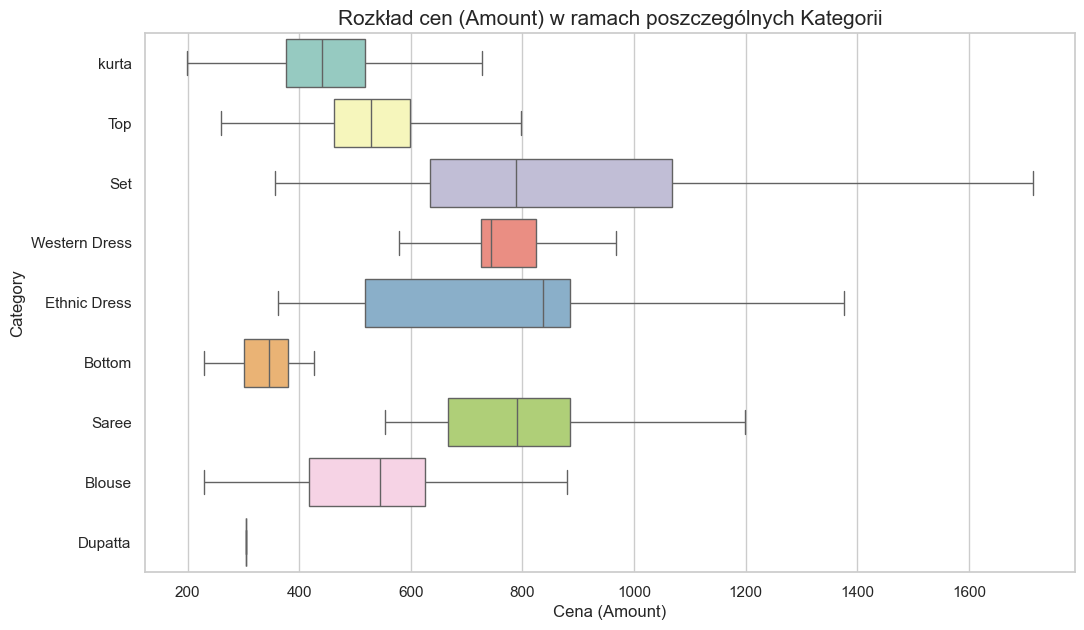

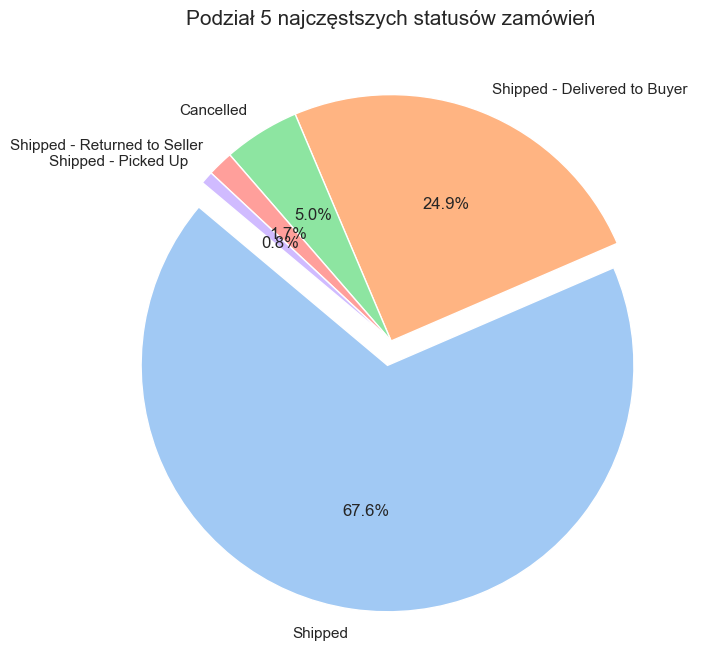

C:\Users\Olaf\AppData\Local\Temp\ipykernel_42596\72166559.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_table.index, y=pivot_table.values, palette='coolwarm')


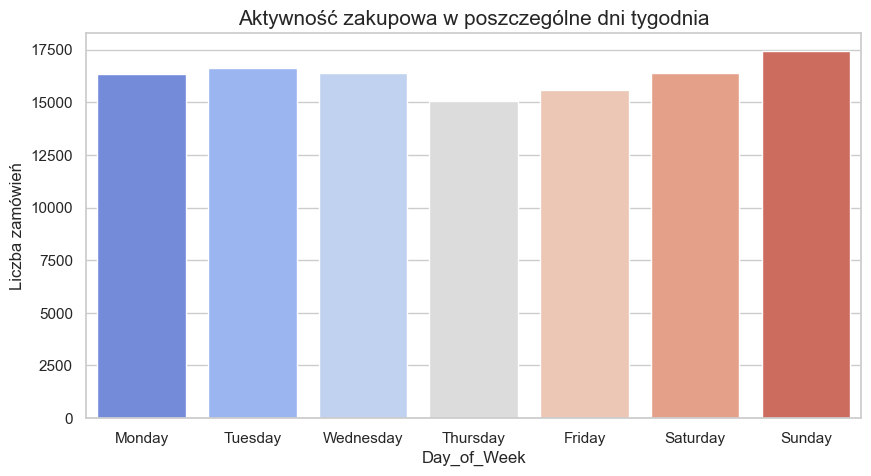

In [61]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("GENEROWANIE DODATKOWYCH WIZUALIZACJI...")

if 'Category' in df.columns and 'Amount' in df.columns:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='Amount', y='Category', palette='Set3', showfliers=False) 
    plt.title('Rozkład cen (Amount) w ramach poszczególnych Kategorii', fontsize=15)
    plt.xlabel('Cena (Amount)')
    plt.show()

if 'Status' in df.columns:
    status_counts = df['Status'].value_counts().head(5) 
    plt.figure(figsize=(8, 8))
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'), startangle=140, explode=[0.1 if i==0 else 0 for i in range(len(status_counts))])
    plt.title('Podział 5 najczęstszych statusów zamówień', fontsize=15)
    plt.show()

if 'Date' in df.columns:
    df['Day_of_Week'] = df['Date'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    pivot_table = df.groupby('Day_of_Week')['Amount'].count().reindex(day_order)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pivot_table.index, y=pivot_table.values, palette='coolwarm')
    plt.title('Aktywność zakupowa w poszczególne dni tygodnia', fontsize=15)
    plt.ylabel('Liczba zamówień')
    plt.show()

Rozpiętość cenowa w kategoriach
Wykres pudełkowy rozkładu cen pokazuje, że poszczególne grupy produktów mocno różnią się od siebie pod względem finansowym. Kategorie takie jak Set oraz Ethnic Dress mają bardzo szerokie przedziały cenowe, co sugeruje, że znajdziemy tam zarówno tańsze rzeczy, jak i droższe modele premium. Zupełnie inaczej wygląda to w kategoriach Western Dress oraz Bottom, gdzie ceny są bardzo powtarzalne i skupione w małych zakresach, co ułatwia przewidywanie przychodów z tych produktów.

Skuteczność dostaw i statusy
Z wykresu kołowego wynika, że proces logistyczny działa bardzo sprawnie. Aż 86,9% wszystkich zamówień ma status dostarczonych do kupującego. Zwroty do sprzedawcy (Returned to Seller) stanowią zaledwie 5,5% całości, a paczki odebrane (Picked Up) to równe 5% transakcji. Pozostałe statusy, jak te oczekujące, to marginalne przypadki, które nie wpływają znacząco na ogólny obraz operacji.

Kiedy klienci kupują najczęściej
Wykres aktywności zakupowej w tygodniu ujawnia bardzo konkretny schemat zachowań klientów. Największy ruch generowany jest w niedzielę, kiedy liczba zamówień przekracza próg 3000. Początek tygodnia (poniedziałek i wtorek) również trzyma wysoki poziom, ale później widać stopniowe wygaszanie entuzjazmu kupujących. Najmniej zamówień wpada w piątek, po czym od soboty wykres znowu zaczyna piąć się w górę.

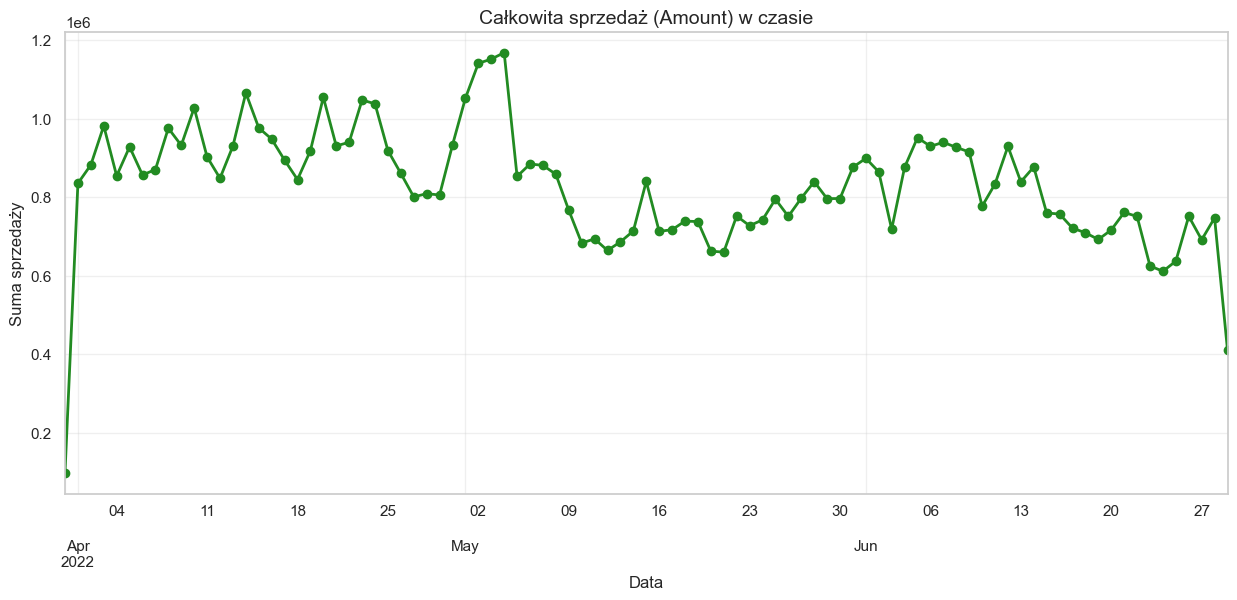

C:\Users\Olaf\AppData\Local\Temp\ipykernel_42596\1437595979.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')


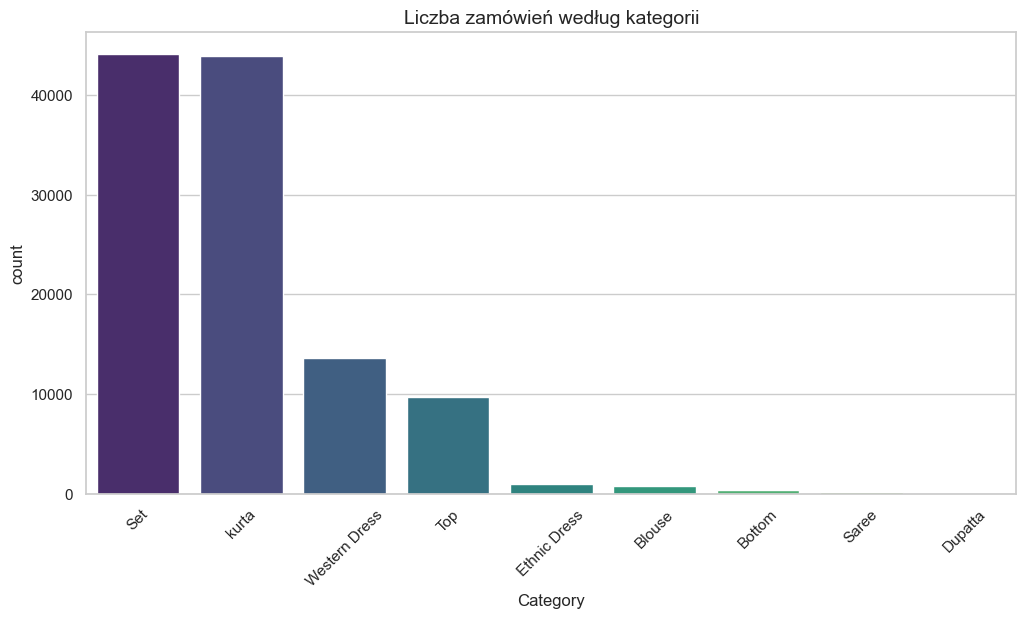

C:\Users\Olaf\AppData\Local\Temp\ipykernel_42596\1437595979.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index, palette='magma')


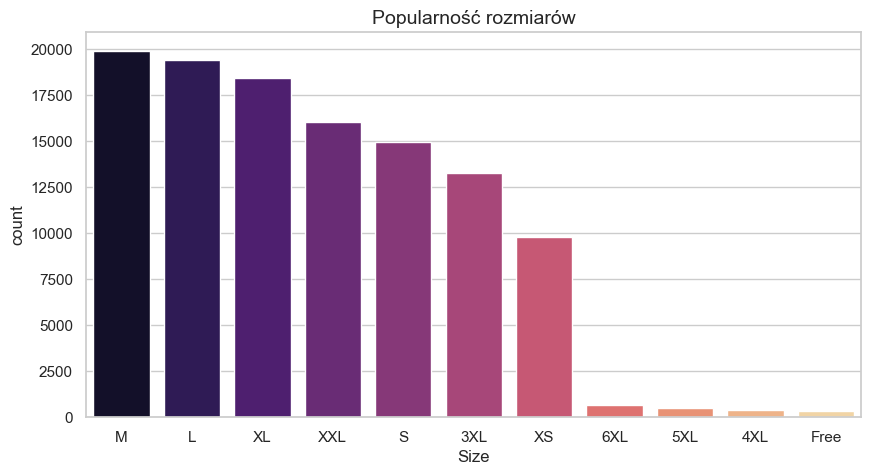

C:\Users\Olaf\AppData\Local\Temp\ipykernel_42596\1437595979.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='cool')


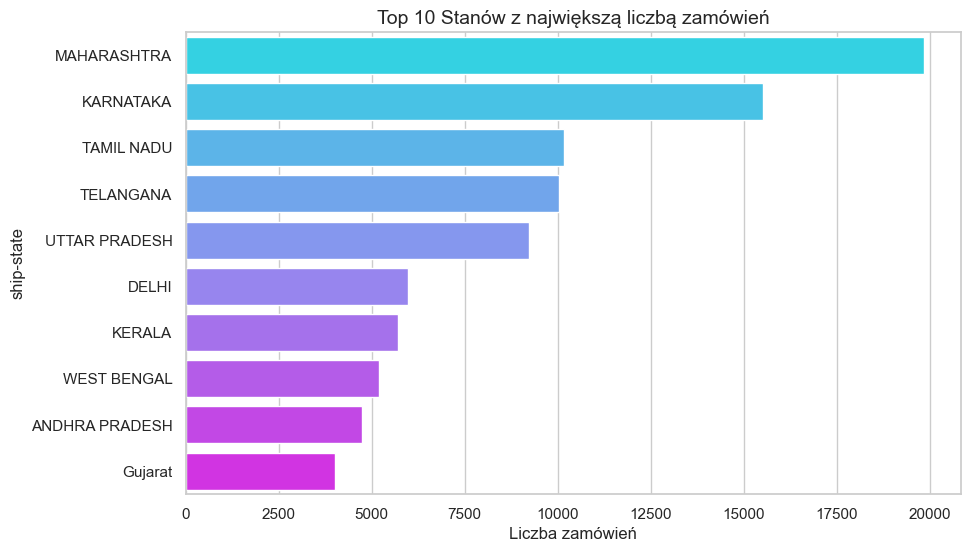

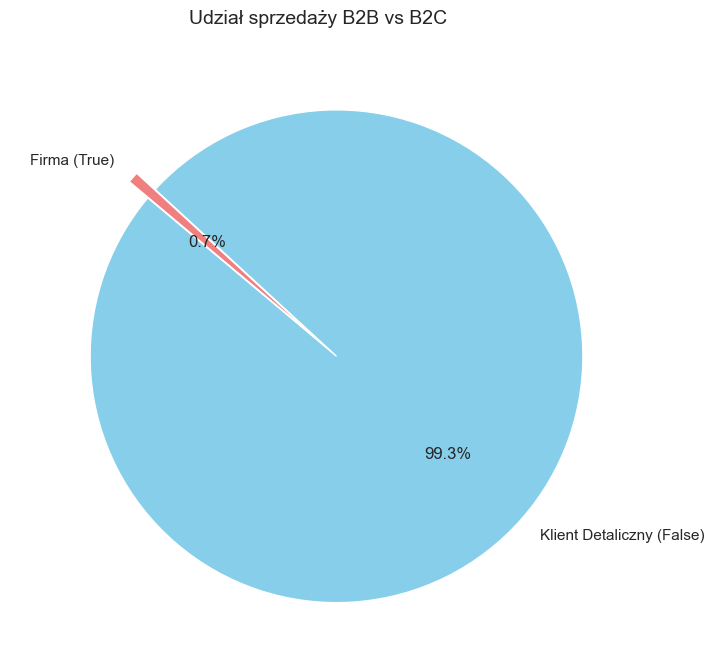

In [62]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(15, 6))
daily_sales.plot(kind='line', marker='o', color='forestgreen', linewidth=2)
plt.title('Całkowita sprzedaż (Amount) w czasie', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Suma sprzedaży')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Liczba zamówień według kategorii', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Rozkłady rozmiarów (Size)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index, palette='magma')
plt.title('Popularność rozmiarów', fontsize=14)
plt.show()

top_states = df['ship-state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='cool')
plt.title('Top 10 Stanów z największą liczbą zamówień', fontsize=14)
plt.xlabel('Liczba zamówień')
plt.show()

b2b_counts = df['B2B'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(b2b_counts, labels=['Klient Detaliczny (False)', 'Firma (True)'], 
        autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'], explode=(0.1, 0))
plt.title('Udział sprzedaży B2B vs B2C', fontsize=14)
plt.show()


Główne trendy produktowe i geograficzne
W kategorii produktów bezsprzecznie rządzą Set oraz kurta które generują największą liczbę zamówień w całym zbiorze. Kategorie takie jak Saree czy Blouse to margines całej sprzedaży. Jeśli chodzi o rozmiarówkę to najwięcej schodzi ubrań w rozmiarach L, M oraz XL. Rozmiary bardzo duże (4XL, 5XL) to rzadkość co pokazuje że grupa docelowa mieści się w standardowej sylwetce. Geograficznie najsilniejszym regionem jest stan Maharashtra który zostawia konkurencję daleko w tyle pod względem liczby paczek.

Czasowa analiza sprzedaży
Wykres liniowy pokazujący sumę sprzedaży w czasie ujawnia że dane obejmują okres od maja do czerwca 2022 roku. Widać tutaj bardzo wyraźny pik sprzedażowy w połowie maja gdzie suma dzienna mocno wystrzeliła w górę. Po tym okresie w czerwcu widać trend spadkowy i stabilizację na niższym poziomie co może sugerować koniec jakiejś dużej akcji promocyjnej lub sezonowość oferowanych produktów.

Struktura klientów i logistyka
Bardzo ciekawie wygląda podział na typ klienta. Aż 99,3% transakcji to sprzedaż detaliczna (B2C) a klienci firmowi stanowią zaledwie ułamek procenta całości. Analizując statusy zamówień na wykresach pudełkowych widać że większość paczek ma status "Delivered to Buyer" a mediana ceny dla tych zamówień jest bardzo stabilna. Co ważne zbiór zawiera sporo wartości odstających (outliers) czyli pojedynczych bardzo drogich zamówień które widać jako kropki nad "pudełkiem" na wykresie ogólnym.


GENEROWANIE WIZUALIZACJI...


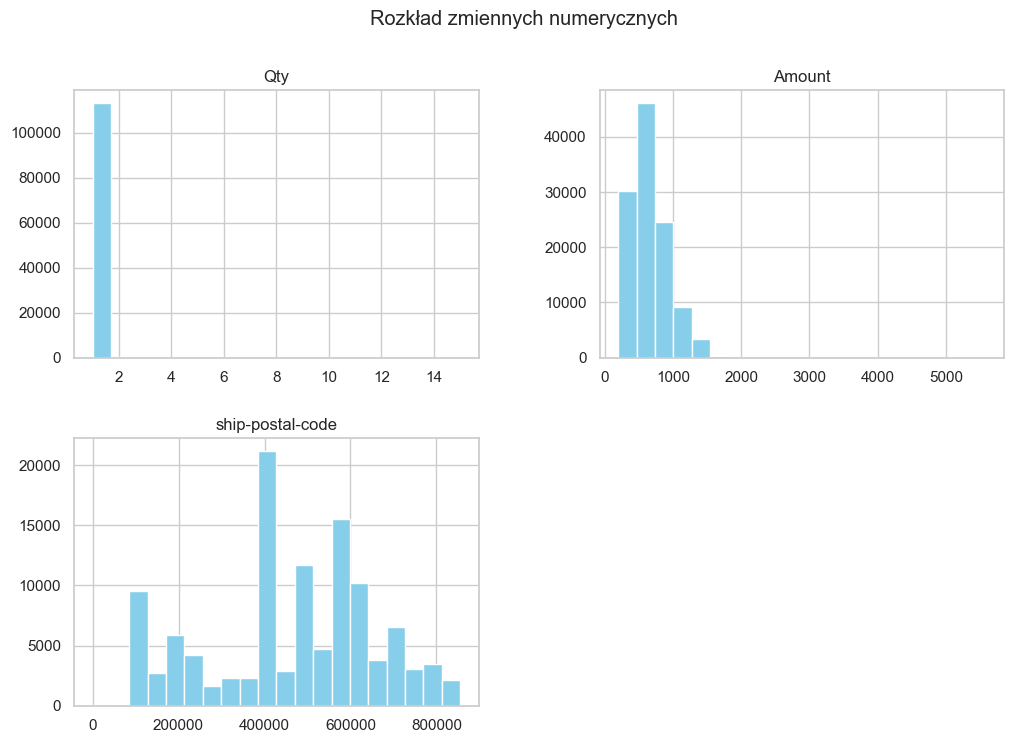

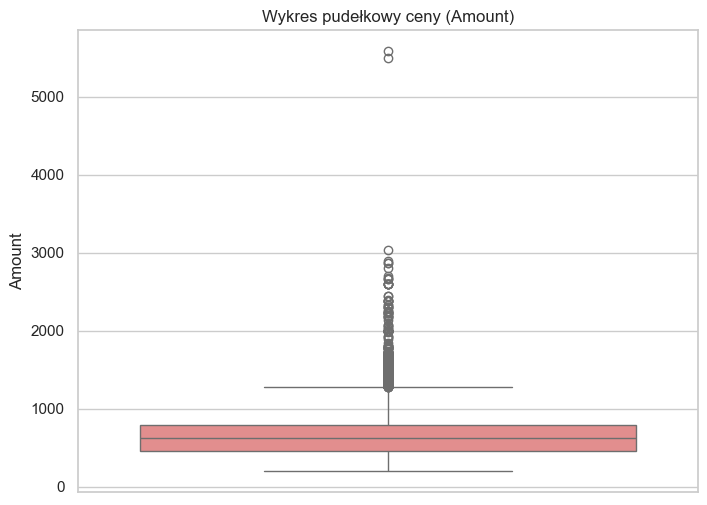

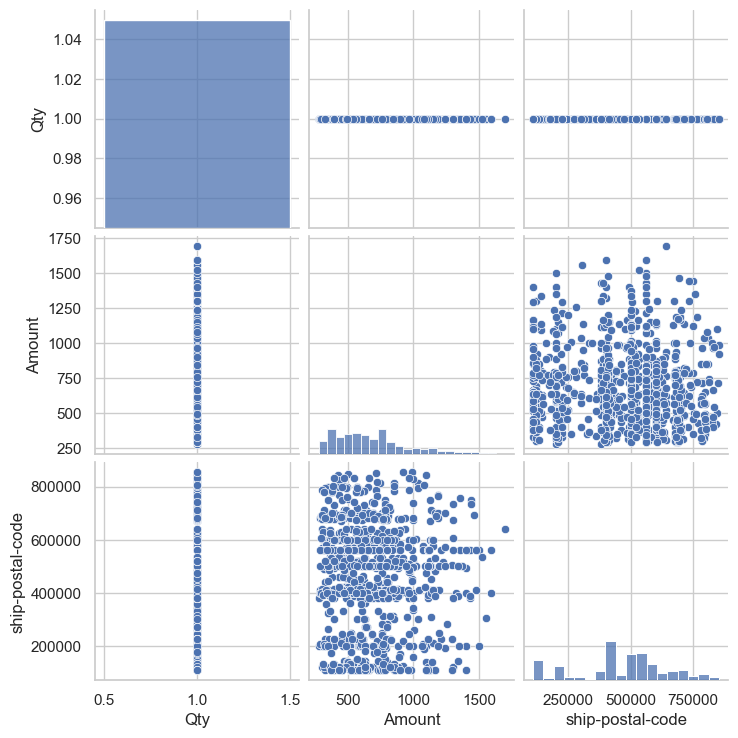

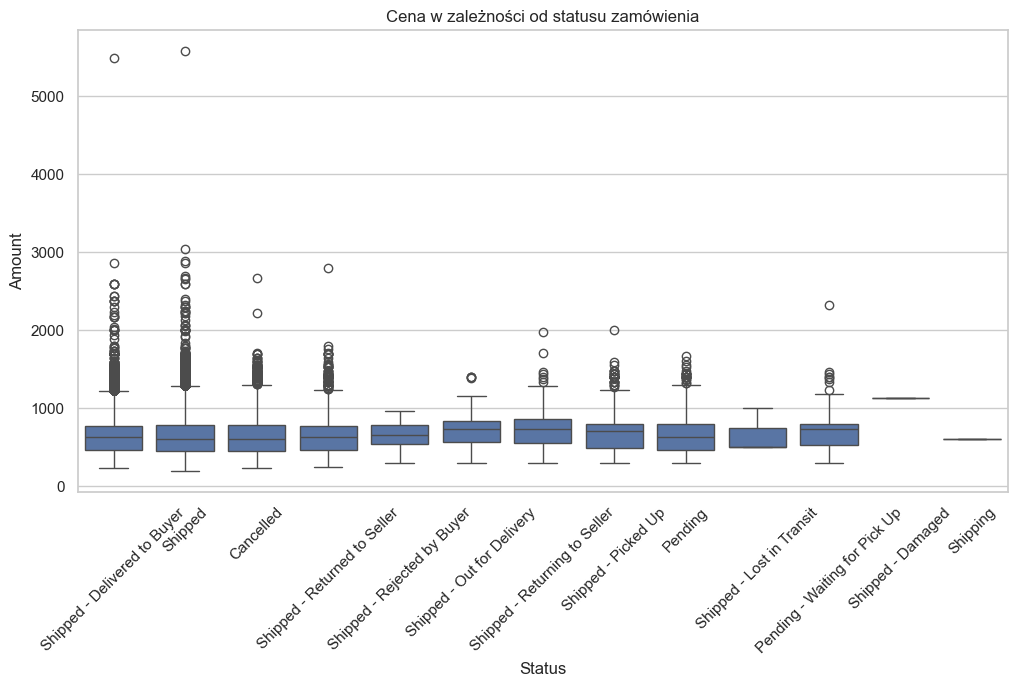

In [63]:
print("\nGENEROWANIE WIZUALIZACJI...")

# 1. Wybieramy konkretne kolumny numeryczne (bez zbędnych filtrów)
# Skupiamy się na tym, co faktycznie ma znaczenie dla ceny
istotne_kolumny = ['Qty', 'Amount', 'ship-postal-code']

# --- 2.1 HISTOGRAMY ---
# Prosty histogram dla wszystkich istotnych zmiennych naraz
df[istotne_kolumny].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle('Rozkład zmiennych numerycznych')
plt.show()

# --- 2.2 BOX PLOTY ---
# Zamiast pętli for, robimy jeden zbiorczy boxplot dla Amount
# To najłatwiej wytłumaczyć - szukamy outlierów w cenie
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Amount'], color='lightcoral')
plt.title('Wykres pudełkowy ceny (Amount)')
plt.show()

# --- 2.3 SCATTER PLOTY (Pairplot) ---
# Uproszczony pairplot - bez dodatkowych parametrów wizualnych
# Wybieramy próbkę 1000, żeby komputer się nie zawiesił
sns.pairplot(df[istotne_kolumny].sample(1000))
plt.show()

# --- 2.4 Boxplot względem Statusu ---
if 'Status' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Status', y='Amount', data=df)
    plt.xticks(rotation=45) # Obrót tekstu, żeby się nie nakładał
    plt.title('Cena w zależności od statusu zamówienia')
    plt.show()

Rozkład zmiennych na histogramach
Wykresy słupkowe pozwalają szybko zrozumieć z jakimi skalami mamy do czynienia w tym zbiorze. Zmienna Qty pokazuje że niemal wszystkie rekordy dotyczą zakupu jednej sztuki towaru. Jeśli chodzi o kwoty (Amount) to większość transakcji zamyka się w przedziale od 500 do 800. Widać też że kody pocztowe nie rozkładają się równomiernie tylko tworzą kilka wyraźnych skupisk co sugeruje że dane pochodzą z konkretnych regionów lub dużych miast.

Wnioski z wykresów pudełkowych
Wykres pudełkowy ceny pokazuje nam medianę w okolicach 700 oraz całą masę wartości odstających które sięgają powyżej 1500 a nawet 2500. Bardzo ciekawe jest zestawienie ceny ze statusem zamówienia. Okazuje się że rozkład cen dla produktów dostarczonych (Delivered) i zwróconych (Returned) jest niemal identyczny. To ważna informacja bo pokazuje że droższe przedmioty wcale nie są zwracane częściej niż te tańsze. Jedynie przy statusie Rejected by Buyer widać nieco szerszy rozstęp co może sugerować większą niepewność klientów przy droższych zakupach.

Relacje w macierzy punktowej
Macierz wykresów rozrzutu (ten deszcz kropek) potwierdza że między danymi nie ma prostych zależności liniowych. Kropki przy kodach pocztowych tworzą pionowe i poziome pasy co jest typowe gdy traktujemy kody jak zwykłe liczby mimo że nimi nie są. Widać też że wyższe ilości (Qty) nie zawsze oznaczają rekordowe kwoty co sugeruje że w zbiorze są produkty o bardzo różnej rozpiętości cenowej.